# AIDI1009 • Assignment 1 • Engineering Graduate Salary Regression
#### Akshit Sharma (200577950) • Priyanka Thomas (200587559)

 Imports & Setup

In [1]:
import warnings, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,5)
sns.set(style="whitegrid")


 Loading Data   

In [2]:
CSV_PATH = Path("./Engineering_graduate_salary.csv")
assert CSV_PATH.exists(), f"CSV not found at {CSV_PATH.resolve()}"
df = pd.read_csv(CSV_PATH)

print("Shape:", df.shape)
display(df.head())
display(df.describe(include="all").transpose())
print("Null counts:\n", df.isna().sum())

Shape: (2998, 34)


,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2998.0,NaN,NaN,NaN,664892.583389,364895.076716,11244.0,333464.75,639694.5,995177.0,1297877.0
Gender,2998,2,m,2282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DOB,2998,1633,1991-07-03,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10percentage,2998.0,NaN,NaN,NaN,77.666264,10.002785,43.0,71.14,78.965,85.6,97.76
10board,2998,221,cbse,1026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12graduation,2998.0,NaN,NaN,NaN,2008.08072,1.631814,1998.0,2007.0,2008.0,2009.0,2012.0
12percentage,2998.0,NaN,NaN,NaN,74.341061,11.120299,40.0,66.0,74.0,82.6,98.7
12board,2998,277,cbse,1039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CollegeID,2998.0,NaN,NaN,NaN,5210.210807,4776.609877,2.0,526.25,4027.5,8822.25,18409.0
CollegeTier,2998.0,NaN,NaN,NaN,1.924616,0.264053,1.0,2.0,2.0,2.0,2.0


Null counts:
 ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64


 Quick EDA Plots

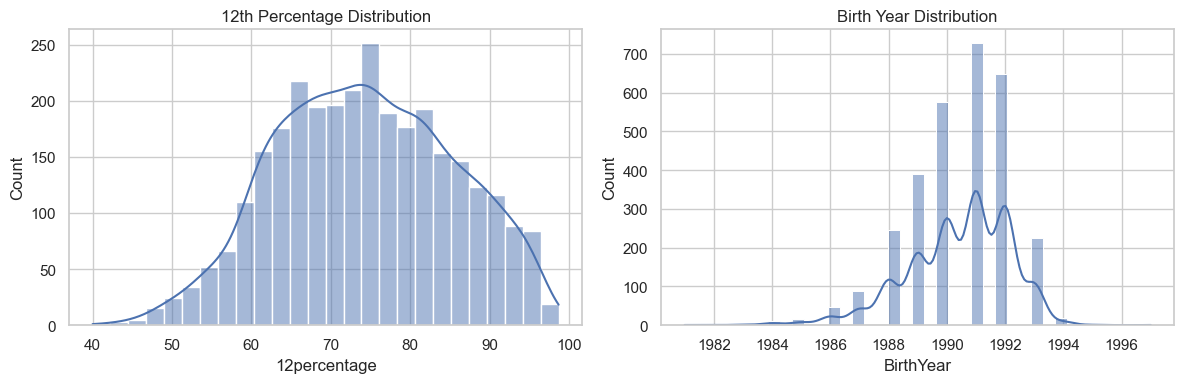

In [3]:
if "DOB" in df.columns:
    df["DOB"] = pd.to_datetime(df["DOB"], errors="coerce")
    df["BirthYear"] = df["DOB"].dt.year


fig, axes = plt.subplots(1, 2, figsize=(12,4))
if "12percentage" in df.columns:
    sns.histplot(df["12percentage"].dropna(), kde=True, ax=axes[0])
    axes[0].set_title("12th Percentage Distribution")
else:
    axes[0].axis("off"); axes[0].set_title("12percentage not found")

if "BirthYear" in df.columns:
    sns.histplot(df["BirthYear"].dropna(), kde=True, ax=axes[1])
    axes[1].set_title("Birth Year Distribution")
else:
    axes[1].axis("off"); axes[1].set_title("BirthYear not found")
plt.tight_layout()
plt.show()


#### Initial Cleaning

In [4]:
drop_cols = [c for c in ["ID", "DOB"] if c in df.columns]
df_cleaned = df.drop(columns=drop_cols, errors="ignore").copy()

eng_cols = [c for c in [
    "MechanicalEngg","ElectricalEngg","TelecomEngg","CivilEngg",
    "ElectronicsAndSemicon","ComputerScience"
] if c in df_cleaned.columns]
if eng_cols:
    df_cleaned[eng_cols] = df_cleaned[eng_cols].replace(-1, np.nan)

print("Cleaned shape:", df_cleaned.shape)
print("Columns after cleaning:", list(df_cleaned.columns))

Cleaned shape: (2998, 33)
Columns after cleaning: ['Gender', '10percentage', '10board', '12graduation', '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Salary', 'BirthYear']


Correlation Heatmap

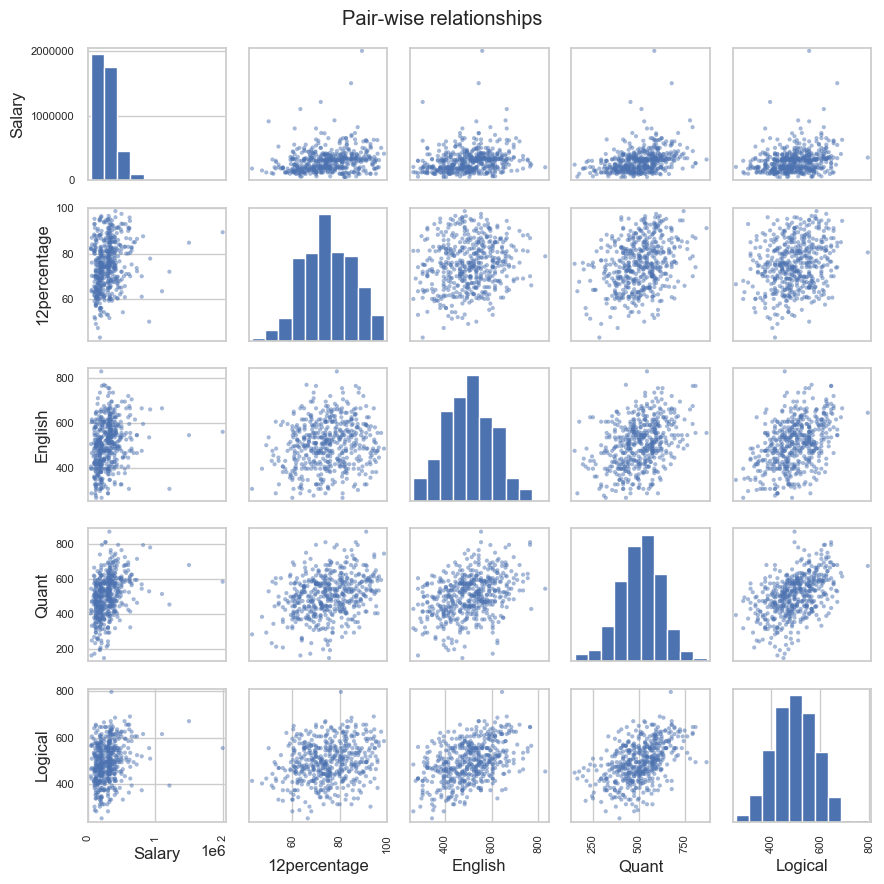

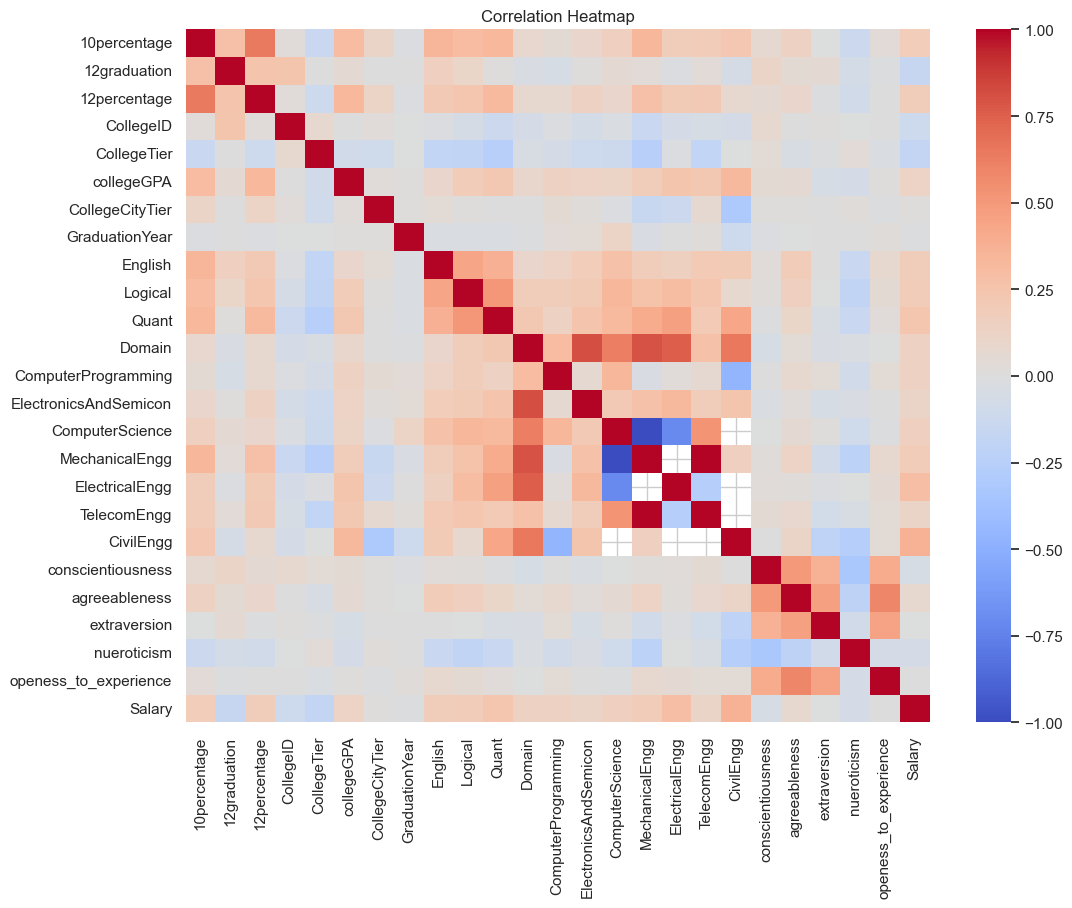

In [28]:
num_cols_full = df_clean.select_dtypes(include=["int64","float64"]).columns.tolist() if not df_clean.empty else []
pair_cols = [c for c in ["Salary","12percentage","CollegeGPA","English","Quant","Logical"] if c in num_cols_full]
if not df_clean.empty:
    if len(pair_cols) >= 2 and len(df_clean) > 1:
        scatter_matrix(df_clean[pair_cols].sample(min(500, len(df_clean))), figsize=(9,9), diagonal="hist")
        plt.suptitle("Pair-wise relationships"); plt.tight_layout(); plt.show()
    num_df = df_clean.select_dtypes(include=["int64","float64"])
    if not num_df.empty:
        plt.figure(figsize=(12,9))
        sns.heatmap(num_df.corr(numeric_only=True), cmap="coolwarm", center=0)
        plt.title("Correlation Heatmap"); plt.show()


Preprocessing Setup

In [6]:
# ===== 5) Preprocessing Setup =====
assert "Salary" in df_cleaned.columns, "Column 'Salary' not found."

X = df_cleaned.drop(columns=["Salary"])
y = df_cleaned["Salary"]

numeric_cols = X.select_dtypes(include=["float64","int64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object","category","bool"]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ],
    remainder="drop"
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Model 1: Linear Regression

In [7]:
pipe_lr_all = Pipeline(steps=[
    ("prep", preprocessor),
    ("lr", LinearRegression())
])

pipe_lr_all.fit(X_train, y_train)
pred_lr_all = pipe_lr_all.predict(X_test)
mse_lr_all = mean_squared_error(y_test, pred_lr_all)
rmse_lr_all = np.sqrt(mse_lr_all)
print(f"[LR-All] MSE: {mse_lr_all:,.2f} | RMSE: {rmse_lr_all:,.2f}")

[LR-All] MSE: 26,079,442,397.36 | RMSE: 161,491.31


 Model 2: Linear Regression (SelectKBest)

In [8]:
from sklearn.utils.validation import check_is_fitted
prep_only = preprocessor.fit(X_train)
transformed_dim = prep_only.transform(X_train).shape[1]
k = max(5, min(20, transformed_dim // 3)) 

pipe_lr_kbest = Pipeline(steps=[
    ("prep", preprocessor),
    ("kbest", SelectKBest(score_func=f_regression, k=k)),
    ("lr", LinearRegression())
])

pipe_lr_kbest.fit(X_train, y_train)
pred_lr_k = pipe_lr_kbest.predict(X_test)
mse_lr_k = mean_squared_error(y_test, pred_lr_k)
rmse_lr_k = np.sqrt(mse_lr_k)
print(f"[LR-SelectKBest(k={k})] MSE: {mse_lr_k:,.2f} | RMSE: {rmse_lr_k:,.2f}")

[LR-SelectKBest(k=20)] MSE: 23,736,446,293.26 | RMSE: 154,066.37


Random Forest + Hyperparameter Tuning

In [9]:
pipe_rf = Pipeline(steps=[
    ("prep", preprocessor),
    ("rf", RandomForestRegressor(random_state=42, n_jobs=-1))
])

param_grid = {
    "rf__n_estimators": [100, 200],
    "rf__max_depth": [None, 10, 20],
    "rf__min_samples_split": [2, 5],
    "rf__min_samples_leaf": [1, 2]
}

gs = GridSearchCV(
    pipe_rf, param_grid, cv=3, scoring="neg_mean_squared_error", n_jobs=-1, verbose=0
)
gs.fit(X_train, y_train)
best_rf = gs.best_estimator_

pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Best RF params:", gs.best_params_)
print(f"[RF-Tuned] MSE: {mse_rf:,.2f} | RMSE: {rmse_rf:,.2f}")


Best RF params: {'rf__max_depth': 20, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
[RF-Tuned] MSE: 25,197,625,363.69 | RMSE: 158,737.60


Comparison Table

In [10]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression (All)",
        f"Linear Regression (SelectKBest k={k})",
        "Random Forest (Tuned)"
    ],
    "MSE": [mse_lr_all, mse_lr_k, mse_rf],
    "RMSE": [rmse_lr_all, rmse_lr_k, rmse_rf]
}).sort_values("RMSE")
display(results.style.format({"MSE":"{:,.2f}", "RMSE":"{:,.2f}"}))

,Model,MSE,RMSE
1,Linear Regression (SelectKBest k=20),"23,736,446,293.26","154,066.37"
2,Random Forest (Tuned),"25,197,625,363.69","158,737.60"
0,Linear Regression (All),"26,079,442,397.36","161,491.31"


Optional: Save Plots of Residuals

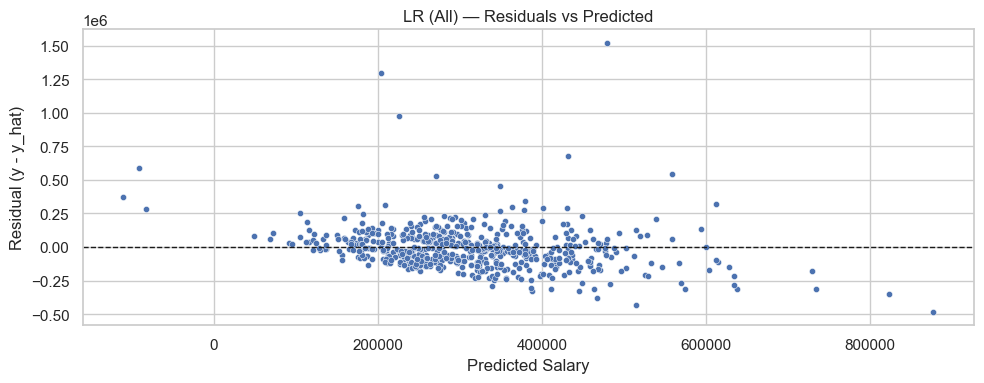

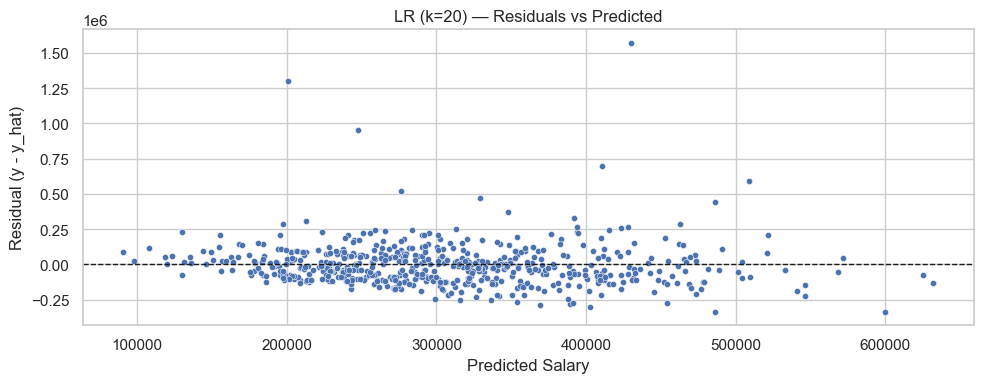

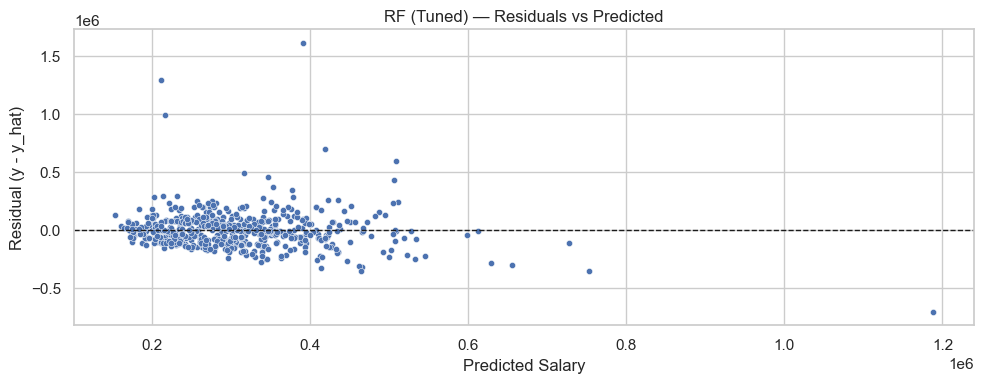

In [11]:
def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred
    plt.figure(figsize=(10,4))
    sns.scatterplot(x=y_pred, y=residuals, s=20)
    plt.axhline(0, ls="--", lw=1, c="k")
    plt.title(title + " — Residuals vs Predicted")
    plt.xlabel("Predicted Salary"); plt.ylabel("Residual (y - y_hat)")
    plt.tight_layout(); plt.show()

plot_residuals(y_test, pred_lr_all, "LR (All)")
plot_residuals(y_test, pred_lr_k, f"LR (k={k})")
plot_residuals(y_test, pred_rf, "RF (Tuned)")